<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Financial Fraud Detection with R and tdplyr
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Introduction</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
    In recent years we have seen a massive increase in Fraud attempts, making fraud detection imperative for Banking and Financial Institutions. Despite countless efforts and human supervision, hundreds of millions of dollars are lost due to fraud. Fraud can happen using various methods, i.e., stolen credit cards, misleading accounting, phishing emails, etc. Due to small cases in significant populations, fraud detection has become more and more challenging. 
    <br>
    <br>
    With ClearScape Analytics, data scientists can use their preferred language, tools and platform to develop models to identify this fraud. Even in large scale operations, users have the guarantee that Vantage can scale to their needs and reduce fraud.</p>
    
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Business Values</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Identification of financial fraud in multiple accounts</li>
    <li>Pattern recognition of fraudulent versus normal transactions</li>
    <li>Reduction of money lost due to recovering fraudulent charges</li>
    <li>Improved customer satisfaction and reduction of customer churn</li>
</ul>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Why Vantage?</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>To maximize the business value of advanced analytic techniques including Machine Learning and Artificial Intelligence, it is estimated that organizations must scale their model development and deployment pipelines to 100s or 1000s of times greater amounts of data, models, or both.
    <br>
    <br>
    ClearScape Analytics provides powerful, flexible end-to-end data connectivity, feature engineering, model training, evaluation, and operational functions that can be deployed at scale as enterprise data assets; treating the products of ML and AI as first-class analytic processes in the enterprise.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>1. Install and load the necessary Packages and Libraries</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
Installing R only needs to be done once for this environment.
<br><br>
To install the package, copy this line into the clipboard:
<blockquote><i>
Rscript -e "install.packages('tdplyr',repos=c('https://r-repo.teradata.com','https://cloud.r-project.org'))"
</i></blockquote> </p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Open a terminal window by selecting File --> New --> and the select Terminal.  Then paste the line at the Command Prompt and press Enter.  This will take a few minutes.  It's finished when you are returned to the <b>(base) jovyan@de76f2e68a54:~/JupyterLabRoot$ </b> Command Prompt.
</p>
    
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here, we import the required libraries, set environment variables and environment paths (if required).</p>

In [1]:
suppressMessages(install.packages("dbplot", quiet = TRUE))

<div class="alert alert-block alert-info">
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Note: </b><i>The above statement will install the required libraries and may give a message about the installation. In case of any message please make sure its just a message or a warning and not any error. After installation make sure to restart the kernel. The simplest way to restart the Kernel is by typing zero zero: <b> 0 0</b></i></p>
</div>

In [2]:
suppressWarnings(suppressMessages({
    library(tdplyr)
    library(dbplyr)
    library(dplyr)
    library(DBI)
    library(dbplot)
    library(ggplot2)
}))

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>2. Connect to Vantage</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will be prompted to provide the password. We will enter the password, press the Enter key, and then use the down arrow to go to the next cell.</p>

In [3]:
con <- td_create_context(host = 'host.docker.internal', uid = "demo_user",
                         pwd = getPass("Enter your password: "), dType = "NATIVE", logmech = "TD2")

Enter your password:  ········


In [4]:
dbExecute(con,"SET query_band='DEMO=Financial_Fraud_Detection_InDB_R.ipynb;' UPDATE FOR SESSION;") 

[1] 1

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We begin running steps with Shift + Enter keys. </p>

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Getting Data for This Demo</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage. We have the option of either running the demo using foreign tables to access the data without using any storage on our environment or downloading the data to local storage, which may yield somewhat faster execution. However, we need to consider available storage. There are two statements in the following cell, and one is commented out. We may switch which mode we choose by changing the comment string.</p>

In [5]:
# dbExecute(con,"call get_data('DEMO_GLM_Fraud_cloud');")       # Takes 1 minute
dbExecute(con,"call get_data('DEMO_GLM_Fraud_local');") # Takes 2min to load the data

[1] 0

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>3. Data Exploration</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We loaded the data from <a href = 'https://www.kaggle.com/code/georgepothur/4-financial-fraud-detection-xgboost/data'>https://www.kaggle.com/code/georgepothur/4-financial-fraud-detection-xgboost/data</a> into Vantage in a table named "transaction_data". We checked the data size and printed sample rows: 63k rows and 12 columns.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b><i>*Please scroll down to the end of the notebook for detailed column descriptions of the dataset.</i></b></p>

In [6]:
txn_data <- tbl(con, in_schema("DEMO_GLM_Fraud", "transaction_data"))
sprintf("No of Rows :%s",td_nrow(txn_data))
txn_data

[1] "No of Rows :63626"

# Source:   table<"DEMO_GLM_Fraud"."transaction_data"> [?? x 12]
# Database: Teradata
      step type      amount nameOrig    oldbalanceOrig newbalanceOrig nameDest  
   <int64> <chr>      <dbl> <chr>                <dbl>          <dbl> <chr>     
 1     330 TRANSFER 171258. C1262115336         31971              0  C14238476…
 2     276 CASH_IN     265. C603474221          11155          11420. C10762291…
 3     326 CASH_IN  394275. C1534911892      25915747.      26310022. C370224798
 4     185 PAYMENT   22727. C1798868399        792343.        769615. M600567802
 5     254 PAYMENT   11117. C669250824              0              0  M661948530
 6     162 CASH_IN  159000. C949891206        5028856.       5187856. C123664854
 7     250 CASH_IN  207198. C449731997       28315747.      28522944. C17183483…
 8     596 CASH_OUT 253599. C2075101553        119704              0  C20529644…
 9      37 CASH_IN  373513. C1905940398       3396236.       3769749. C715907650
10     540 CASH_IN  384

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In this simulated scenario, deceptive agents engage in transactions with the objective of taking control of customers' accounts, transferring funds to another account, and ultimately cashing out for profit.</p>

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.1 How many fraudulent transactions do we have in our dataset?</b></p>

In [7]:
# There are 92 fraud transactions i.e. 0.14% of fraud transactions in the dataset.
df_isFraud <- txn_data %>% filter(isFraud == 1) 
sprintf("No of fraud transactions: %s" ,td_nrow(df_isFraud))
sprintf("Percentage of fraud transactions: %.2f%%" ,td_nrow(df_isFraud)/td_nrow(txn_data)*100)

[1] "No of fraud transactions: 92"

[1] "Percentage of fraud transactions: 0.14%"

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.2 How many transactions do we have group by transaction type?</b></p>

In [8]:
# Filter data for fraud transactions and group by 'type'
transactions_by_type = txn_data %>% group_by(type) %>% summarise(count_txn_id = n(txn_id)) 
transactions_by_type %>% arrange(desc(count_txn_id))

# Source:     SQL [5 x 2]
# Database:   Teradata
# Ordered by: desc(count_txn_id)
  type     count_txn_id
  <chr>         <int64>
1 CASH_OUT        22365
2 PAYMENT         21466
3 CASH_IN         14084
4 TRANSFER         5290
5 DEBIT             421

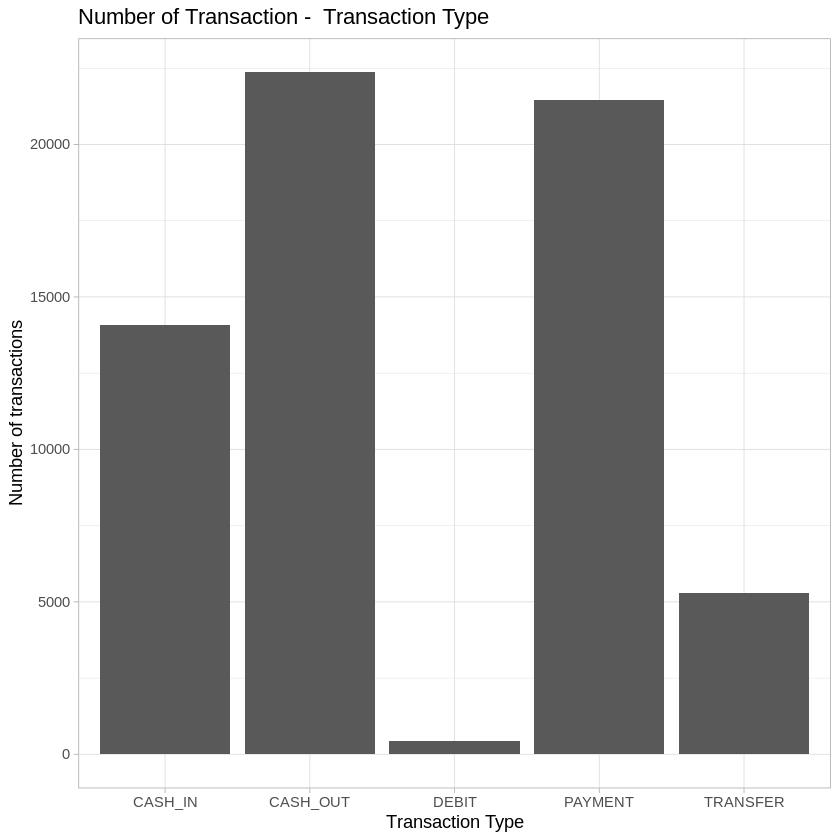

In [9]:
txn_data %>%
  dbplot_bar(type,count(txn_id)) +
  labs(title = "Number of Transaction -  Transaction Type",
      x = "Transaction Type",
    y = "Number of transactions",
    colour = "blue") +
  theme_light() 

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.3 How many fraudulent transactions do we have group by transaction type?</b></p>

In [10]:
fraud_transactions_by_type <- txn_data %>% filter(isFraud == 1)%>% group_by(type) %>% summarise(count_txn_id = n(txn_id))
# fraud_transactions_by_type %>% arrange(desc(count_txn_id))
x = td_nrow(df_isFraud)
fraud_transactions_by_type <- fraud_transactions_by_type %>% 
                            mutate(total_fraud = x
                                ,type_int = case_when(type == 'TRANSFER' ~ 0, TRUE ~ 1))

fraud_transactions_by_type %>% arrange(desc(count_txn_id))

# Source:     SQL [2 x 4]
# Database:   Teradata
# Ordered by: desc(count_txn_id)
  type     count_txn_id total_fraud type_int
  <chr>         <int64>       <int>    <dbl>
1 TRANSFER           47          92        0
2 CASH_OUT           45          92        1

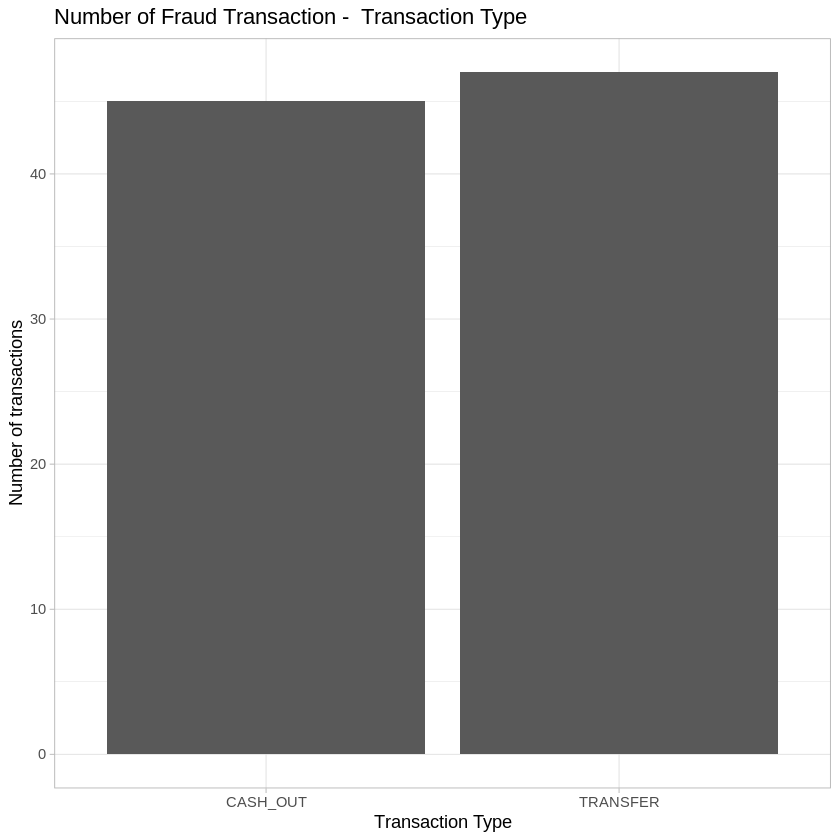

In [11]:
fraud_transactions_by_type %>%
  dbplot_bar(type,avg(count_txn_id)) +
  labs(title = "Number of Fraud Transaction -  Transaction Type",
      x = "Transaction Type",
    y = "Number of transactions",
    colour = "blue") +
  theme_light() 

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>From the above result, we can see that out of the 92 fraud transactions, 47 are from transaction type "TRANSFER" and 45 are from "CASH_OUT".</p>

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.4 What percentage of fraudulent transactions do we have where transaction amount is equal to old balance in the origin account?</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>This might be the case where the fraudster emptied the account of the victim.</p>

In [12]:
df_cleanout <- txn_data %>% filter(amount == oldbalanceOrig) %>% filter(isFraud == 1) 
sprintf("No of cleanout fraud transactions: %s" ,td_nrow(df_cleanout))
sprintf("Percentage of fraud transactions: %.2f%%" ,td_nrow(df_cleanout)/td_nrow(df_isFraud)*100)

[1] "No of cleanout fraud transactions: 90"

[1] "Percentage of fraud transactions: 97.83%"

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>From the above result, we can see that out of 92 Fraud transactions, the amount involved in 90 fraud transactions was equal to the total balance in the account. </p>

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Below are some insights about the dataset:</b></p>
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>We have 92 fraud transactions, which account for 0.14% of the dataset.</li>
    <li>Out of these 92 fraud transactions, 47 are of type TRANSFER, and 45 are of type CASH_OUT.</li>
    <li>Approximately 97.83% of our fraud transactions have a transaction amount equal to oldbalanceOrig, indicating account cleanout.</li>
    <li>About 71.74% of our fraud transactions have the recipient's old balance as zero.</li>
    <li>The isFlaggedFraud indicator is correct only two times among our 92 fraud transactions.</li>
</ol>

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.5 Univariate statistics</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The describe funtion computes the count, mean, std, min, percentiles, and max for numeric columns.</p>

In [13]:
glimpse(txn_data)

Rows: ??
Columns: 12
Database: Teradata
$ step           <int64> 401, 160, 19, 202, 404, 9, 237, 407, 304, 227, 226, 1…
$ type           <chr> "CASH_OUT", "PAYMENT", "CASH_IN", "CASH_IN", "PAYMENT",…
$ amount         <dbl> 307960.73, 2324.17, 130046.25, 153085.32, 9752.38, 5254…
$ nameOrig       <chr> "C113076652", "C1102639889", "C2075921797", "C122413817…
$ oldbalanceOrig <dbl> 22613.0, 15329.0, 10728904.8, 3931005.2, 15371.0, 0.0, …
$ newbalanceOrig <dbl> 0.00, 13004.83, 10858951.06, 4084090.51, 5618.62, 0.00,…
$ nameDest       <chr> "C1705423130", "M1686469215", "C104209789", "C210359376…
$ oldbalanceDest <dbl> 0.00, 0.00, 3308248.09, 371143.05, 0.00, 0.00, 183648.5…
$ newbalanceDest <dbl> 307960.73, 0.00, 3460003.88, 218057.72, 0.00, 0.00, 407…
$ isFraud        <int64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ isFlaggedFraud <int64> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ txn_id         <int64> 48023, 25755, 469, 20188, 42925, 26224, 40376, 23675,…


<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.6 Checking for Null Values</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The ColumnSummary() function can be used to take a quick look at the columns, their datatypes, and summary of NULLs/non-NULLs for a given table.</p>

In [14]:
colsum <- td_column_summary_sqle(data=txn_data,
                        target.columns=c("amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest")
                       )
# Print the result.
print(colsum$result)

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614276149407"> [5 x 10]
# Database: Teradata
  ColumnName  Datatype NonNullCount NullCount BlankCount ZeroCount PositiveCount
  <chr>       <chr>         <int64>   <int64>    <int64>   <int64>       <int64>
1 oldbalance… FLOAT           63626         0         NA     20853         42773
2 oldbalance… FLOAT           63626         0         NA     26871         36755
3 newbalance… FLOAT           63626         0         NA     36061         27565
4 newbalance… FLOAT           63626         0         NA     24334         39292
5 amount      FLOAT           63626         0         NA         0         63626
# ℹ 3 more variables: NegativeCount <int64>, NullPercentage <dbl>,
#   NonNullPercentage <dbl>


<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.7 Checking for Outliers</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The OutlierFilterFit() function calculates the lower percentile, upper percentile, count of rows and median for all the "target_columns" provided by the user. These metrics for each column help the function OutlierTransform() detect outliers in data.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here we are using Teradata R library syntax for the function. The same can be achived using the following SQL as well.</p>

<code>SELECT * FROM TD_OutlierFilterFit(
    ON "DEMO_GLM_Fraud"."transaction_data" AS InputTable
    OUT TABLE OutputTable("DEMO_USER"."Outlier_output")
    USING
    TargetColumns('amount','newbalanceOrig','oldbalanceDest','newbalanceDest','oldbalanceOrig')
) as dt;</code>

<p style = 'font-size:14px;font-family:Arial;color:#00233C'><b><i>*Please note that both the versions run in-database and there is no data transfer involved.</i></b></p>

In [15]:
fit_object <- td_outlier_filter_fit_sqle (
      data = txn_data,
      target.columns = c("amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest")
      )

res <- td_outlier_filter_transform_sqle(data=txn_data, object=fit_object)
# Print the result.
print(res$result)

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614289316069"> [?? x 12]
# Database: Teradata
      step type      amount nameOrig    oldbalanceOrig newbalanceOrig nameDest  
   <int64> <chr>      <dbl> <chr>                <dbl>          <dbl> <chr>     
 1      19 CASH_OUT 156151. C386570510              0              0  C17677354…
 2     185 CASH_OUT  21454. C416161521          10826              0  C14763331…
 3     132 TRANSFER 125924. C614259876              0              0  C16318458…
 4     305 PAYMENT   11968. C1905296371          8789              0  M976230211
 5     180 CASH_IN  263108. C1854394181        476970         740078. C19695696…
 6     540 CASH_IN  384767. C1622240285         19806         404573. C14366029…
 7     330 TRANSFER 171258. C1262115336         31971              0  C14238476…
 8      37 CASH_IN  373513. C1905940398       3396236.       3769749. C715907650
 9     205 CASH_OUT 122666. C591000084              0              0  C17803651…
10     25

In [16]:
sprintf("Rows before removing outliers: %s" ,td_nrow(txn_data))
sprintf("Rows after removing outliers: %s" ,td_nrow(res$result))
sprintf("Total outliers: %s" ,td_nrow(txn_data)-td_nrow(res$result))

[1] "Rows before removing outliers: 63626"

[1] "Rows after removing outliers: 51757"

[1] "Total outliers: 11869"

In [17]:
df_setdiff <- txn_data %>% setdiff(res$result)
df_setdiff

# Source:   SQL [?? x 12]
# Database: Teradata
      step type       amount nameOrig    oldbalanceOrig newbalanceOrig nameDest 
   <int64> <chr>       <dbl> <chr>                <dbl>          <dbl> <chr>    
 1     185 TRANSFER 1301203. C1380273423         15108              0  C1271670…
 2     329 TRANSFER 2529755. C91624586               0              0  C5151929…
 3     259 TRANSFER  728596. C1812721219        150675              0  C1559193…
 4     158 CASH_IN    81814. C1931390990      13283252.      13365067. C3589785…
 5     160 CASH_IN   531211. C1767703889        214941.        746151. C1672024…
 6     349 CASH_IN   633461. C38195547          325486.        958946. C7175528…
 7     305 CASH_OUT  344653. C1251833093             0              0  C3415528…
 8     518 CASH_OUT  607093. C117917771         105814              0  C94159799
 9      43 CASH_IN   251677. C874563083       25788113.      26039790. C1990020…
10     241 DEBIT       3087. C1685107204          1251        

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>4. Data Preparation</b>

<p style='font-size:16px;font-family:Arial;color:#00233C'><b>We'll perform the following steps:</b></p>
<ul style='font-size:16px;font-family:Arial;color:#00233C'>
    <li>We will one-hot encode the categorical "type" column.</li>
    <li>We will perform feature scaling using ScaleFit and ScaleTransform on numerical columns.</li>
    <li>We will split the data into training and testing datasets (80:20 split).</li>
</ul>

<p style='font-size:16px;font-family:Arial;color:#00233C'>We perform feature scaling during data pre-processing to handle highly varying magnitudes, values, or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values higher and consider smaller values as lower ones, regardless of the unit of the values.</p>

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.1 Drop redundant columns</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We don't need nameDest, nameOrigin, and isFlaggedFraud for model training as they do not impact the outcome. We have txn_id to uniquely identify each transaction.</p>

In [18]:
txn_data = select(txn_data, -c("nameDest", "nameOrig", "isFlaggedFraud"))
txn_data

# Source:   SQL [?? x 9]
# Database: Teradata
      step type      amount oldbalanceOrig newbalanceOrig oldbalanceDest
   <int64> <chr>      <dbl>          <dbl>          <dbl>          <dbl>
 1     401 CASH_OUT 307961.         22613              0              0 
 2     160 PAYMENT    2324.         15329          13005.             0 
 3      19 CASH_IN  130046.      10728905.      10858951.       3308248.
 4     202 CASH_IN  153085.       3931005.       4084091.        371143.
 5     404 PAYMENT    9752.         15371           5619.             0 
 6       9 PAYMENT    5254.             0              0              0 
 7     237 CASH_IN  142851.           130         142981.        183649.
 8     324 PAYMENT    6746.             0              0              0 
 9      19 CASH_OUT 156151.             0              0         364753.
10     397 CASH_IN   48424.       3142773.       3191197.       7114121.
# ℹ more rows
# ℹ 3 more variables: newbalanceDest <dbl>, isFraud <int64>, txn

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.2 One-hot encoding</b></p>
<p style='font-size:16px;font-family:Arial;color:#00233C'>
Here, we are one-hot encoding the "type" column. We find one-hot encoding necessary in many cases to represent categorical variables as binary values, enable numerical processing, ensure feature independence, handle non-numeric data, and improve the performance and interpretability of our machine learning models.
</p>

In [19]:
txn_data <- txn_data %>% rename(txn_type = type)
fit_obj <- td_one_hot_encoding_fit_sqle(
                                data=txn_data,
                                is.input.dense=TRUE,
                                target.column="txn_type",
                                categorical.values=c('CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER')
)

In [20]:
# Encode "male" and "female" values of column "sex".
# Note that tbl_teradata representing the model is passed as
# input to "object".
obj <- td_one_hot_encoding_transform_sqle(
                                  data=txn_data,
                                  object=fit_obj$result,
                                  is.input.dense=TRUE)

# Print the result.
txn_trans = obj$result
txn_trans

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614312914535"> [?? x 14]
# Database: Teradata
      step txn_type_CASH_IN txn_type_CASH_OUT txn_type_DEBIT txn_type_PAYMENT
   <int64>            <int>             <int>          <int>            <int>
 1     401                0                 1              0                0
 2     180                1                 0              0                0
 3     540                1                 0              0                0
 4     330                0                 0              0                0
 5     205                0                 1              0                0
 6     251                1                 0              0                0
 7      13                0                 1              0                0
 8     590                0                 0              0                0
 9     185                0                 1              0                0
10     132                0               

<hr style="height:1px;border:none;background-color:#00233C;">
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.3 Feature Scaling</b></p>
<p style='font-size:16px;font-family:Arial;color:#00233C'>Here, we are using ScaleFit and ScaleTransform for scaling our numerical columns using Standard Deviation as the scale method.
<br><br>
Feature scaling is important in our machine learning process to avoid numerical instability, ensure fair comparison of features, improve our model performance, enhance interpretability, and handle distance-based algorithms.</p>

In [21]:
fit_obj <- td_scale_fit_sqle(data=txn_trans,
                                 target.columns=c("step", "amount","newbalanceOrig", "oldbalanceDest","newbalanceDest","oldbalanceOrig"),
                                 scale.method="STD")

# Print the result.
print(fit_obj$result)

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614314925121"> [?? x 7]
# Database: Teradata
   TD_STATTYPE_SCLFIT      step        amount newbalanceOrig oldbalanceDest
   <chr>                  <dbl>         <dbl>          <dbl>          <dbl>
 1 sum                15520892   11708426279.        5.43e10        7.14e10
 2 null                      0             0         0              0      
 3 avg                     244.       184020.        8.54e 5        1.12e 6
 4 variance              20254. 391411505353.        8.42e12        1.26e13
 5 ustd                    142.       625629.        2.90e 6        3.55e 6
 6 multiplier                1             1         1   e 0        1   e 0
 7 intercept                 0             0         0              0      
 8 std                     142.       625624.        2.90e 6        3.55e 6
 9 count                 63626         63626         6.36e 4        6.36e 4
10 max                     718      36946552.        3.49e 7     

In [22]:
obj <- td_scale_transform_sqle(data=txn_trans,
                               object=fit_obj$result,
                               accumulate=c("txn_id", "isFraud", "txn_type_CASH_IN", "txn_type_CASH_OUT","txn_type_DEBIT",
                                            "txn_type_PAYMENT", "txn_type_TRANSFER"))

# Print the result.
# print(obj$result)
cleandf = obj$result
cleandf

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614318732391"> [?? x 13]
# Database: Teradata
    txn_id isFraud txn_type_CASH_IN txn_type_CASH_OUT txn_type_DEBIT
   <int64> <int64>            <int>             <int>          <int>
 1   62175       0                0                 0              0
 2   53590       0                1                 0              0
 3   28304       0                1                 0              0
 4   48023       0                0                 1              0
 5   33871       0                0                 1              0
 6    8585       0                1                 0              0
 7   22737       0                0                 1              0
 8   17170       0                0                 0              0
 9   14152       0                1                 0              0
10   59157       0                1                 0              0
# ℹ more rows
# ℹ 8 more variables: txn_type_PAYMENT <int>, txn_type_TRA

In [23]:
clean_data_df <- as.data.frame(cleandf)
copy_to(con, clean_data_df, name="clean_data", overwrite=TRUE)

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The above output shows that we have transformed the data into a scaled dataset.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>5. Create training and testing datasets in Vantage</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We'll create two datasets for training and testing in the ratio of 80:20.</p>

In [24]:
TrainTestSplit_out <- td_train_test_split_sqle(
                            data = cleandf,
                            id.column="txn_id",
                            train.size=0.90,
                            test.size=0.10,
                            seed=24)
TrainTestSplit_out$result

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614328446838"> [?? x 14]
# Database: Teradata
   TD_IsTrainRow  txn_id isFraud txn_type_CASH_IN txn_type_CASH_OUT
           <int> <int64> <int64>            <int>             <int>
 1             1      12       0                0                 0
 2             0       9       0                1                 0
 3             1      10       0                0                 0
 4             1      11       0                0                 1
 5             0       1       0                1                 0
 6             1       2       0                0                 1
 7             1       3       0                0                 0
 8             1       5       0                0                 0
 9             0       6       0                0                 0
10             1      14       0                1                 0
# ℹ more rows
# ℹ 9 more variables: txn_type_DEBIT <int>, txn_type_PAYMENT <int>,
# 

In [25]:
df_train = TrainTestSplit_out$result %>% filter(TD_IsTrainRow == 1) 
df_train = select(df_train, -c("TD_IsTrainRow"))
df_test = TrainTestSplit_out$result %>% filter(TD_IsTrainRow == 0)
df_test = select(df_test, -c("TD_IsTrainRow"))
sprintf("Training Set = %s" , td_nrow(df_train))
sprintf("Testing Set = %s" , td_nrow(df_test))

[1] "Training Set = 57263"

[1] "Testing Set = 6363"

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The above output shows that we have transformed the data into a scaled dataset. Scaling our data makes it easy for our model to learn and understand the problem.</p>

In [26]:
train_df <- as.data.frame(df_train)
copy_to(con, train_df , name="train_data", overwrite=TRUE)
test_df <- as.data.frame(df_test)
copy_to(con, test_df , name="test_data", overwrite=TRUE)

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>6. In-Database GLM model training</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The TD_GLM function as a generalized linear model (GLM) for performing regression and classification analyses on data sets, where the response follows an exponential or binomial family distribution.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>When using the function, we should provide only numeric features. We need to convert the categorical features to numeric values before training. Additionally, during training, TD_GLM function skips the rows with missing (null) values.</p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here we are using teradataml syntax for the function. The same can be achived using the following SQL as well.</p>

<code>SELECT * FROM TD_GLM(
    ON "DEMO_USER"."clean_data_train" AS inputtable
    PARTITION BY ANY
    OUT TABLE MetaInformationTable("DEMO_USER"."glm_output")
    USING
    InputColumns('[2:12]')
    ResponseColumn('isFraud')
    Family('Binomial')
) as dt;</code>

<p style = 'font-size:14px;font-family:Arial;color:#00233C'><b><i>*Please note that both the versions run in-database and there is no data transfer involved.</i></b></p>

In [27]:
df_train <- tbl(con, "train_data")
df_test <- tbl(con, "test_data")

In [28]:
GLM_out <- td_glm(input.columns= 
                                    c("txn_type_CASH_IN","txn_type_CASH_OUT","txn_type_DEBIT",
                                      "txn_type_PAYMENT","txn_type_TRANSFER","step","amount","newbalanceOrig",
                                      "oldbalanceDest","newbalanceDest","oldbalanceOrig"),
                             response.column = "isFraud",
                             data = df_train,
                             family = 'BINOMIAL',
                             learning.rate = 'OPTIMAL',
                             iter.max = 6,
                             batch.size = 18,
                             lambda1 = 0.003,
                              tolerance = 0.08,
                              momentum = 0.0065)
GLM_out$result

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614371186983"> [?? x 4]
# Database: Teradata
   attribute predictor         estimate value
       <int> <chr>                <dbl> <chr>
 1         2 txn_type_CASH_OUT -0.829   NA   
 2         4 txn_type_PAYMENT  -1.03    NA   
 3         5 txn_type_TRANSFER -0.0776  NA   
 4         6 step               0.00723 NA   
 5         8 newbalanceOrig    -0.115   NA   
 6         9 oldbalanceDest     0.0876  NA   
 7        10 newbalanceDest     0.0998  NA   
 8         7 amount             0.0384  NA   
 9         3 txn_type_DEBIT     0       NA   
10         1 txn_type_CASH_IN  -0.757   NA   
# ℹ more rows

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The function output is a trained GLM model, and we can input it to the TDGLMPredict function for prediction. Our model also contains model statistics like MSE, Loglikelihood, AIC, and BIC.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>7. In-Database GLM model scoring</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The TDGLMPredict function predicts target values (regression) and class labels (classification) for test data using a GLM model trained by the GLM function.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
When using the function, we should provide only numeric features. We need to convert the categorical features to numeric values before prediction.</p>

In [29]:
TDGLMPredict_out <- td_glm_predict(
                                    object=GLM_out$result,
                                    newdata=df_test,
                                    accumulate="isFraud",
                                    id.column="txn_id",
                                    output.prob=TRUE,
                                    output.responses = c('0','1'))

# Print the result.
# print(TDGLMPredict_out$result)
glm_predict = TDGLMPredict_out$result
glm_predict

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614373275406"> [?? x 5]
# Database: Teradata
   txn_id prediction prob_0 prob_1 isFraud
    <dbl>      <dbl>  <dbl>  <dbl>   <dbl>
 1      4          0  0.928 0.0715       0
 2      8          0  0.974 0.0260       0
 3     16          0  0.981 0.0194       0
 4     27          0  0.972 0.0285       0
 5     24          0  0.981 0.0194       0
 6     32          0  0.975 0.0246       0
 7     39          0  0.976 0.0244       0
 8     21          0  0.970 0.0298       0
 9      6          0  0.980 0.0196       0
10      9          0  0.974 0.0257       0
# ℹ more rows

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The output above shows our prob_1, i.e., the transaction is fraud, and prob_0, i.e., the transaction is not a fraud. We use these probabilities in our prediction column to assign a class label.</p>

In [30]:
predicted_data <- td_convert_to_sqle(data = glm_predict,
                                         target.columns = c("isFraud","prediction"),
                                         target.datatype = c("integer"))

In [31]:
ClassificationEvaluator_obj <- td_classification_evaluator_sqle(
                                    data=predicted_data$result,
                                    observation.column='isFraud',
                                    prediction.column='prediction',
                                    labels=c('0','1'))

# Print the result tbl_teradata objects.
print(ClassificationEvaluator_obj$output.data)

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614374915879"> [10 x 3]
# Database: Teradata
   SeqNum Metric             MetricValue
    <int> <chr>                    <dbl>
 1      3 Micro-Recall             0.999
 2      5 Macro-Precision          0.500
 3      6 Macro-Recall             0.500
 4      7 Macro-F1                 0.500
 5      9 Weighted-Recall          0.999
 6     10 Weighted-F1              0.998
 7      8 Weighted-Precision       0.998
 8      4 Micro-F1                 0.999
 9      2 Micro-Precision          0.999
10      1 Accuracy                 0.999


<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>8. Visualize the results (ROC curve and AUC)</b>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We create the ROC curve, which is a graph between TPR (True Positive Rate) and FPR (False Positive Rate). We use the area under the ROC curve as a metric to evaluate how well our model can distinguish between positive and negative classes. A higher AUC indicates better performance in distinguishing between the positive and negative categories. We generally consider an AUC above 0.75 as decent.</p>

In [32]:
predicted_data <- td_convert_to_sqle(data = glm_predict,
                                         target.columns = c("isFraud"),
                                         target.datatype = c("integer")
                                    )

In [33]:
roc_out <- td_roc(
                probability.column="prob_1",
                observation.column="isFraud",
                positive.class="1",
                data=predicted_data$result,
                num_thresholds=300)

# Print the result.
print(roc_out$result)
print(roc_out$output.data)

# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614377096203"> [1 x 2]
# Database: Teradata
    AUC  GINI
  <dbl> <dbl>
1 0.720 0.441
# Source:   table<"DEMO_USER"."r__t__td_sqlmr_out_1725614377077767"> [?? x 3]
# Database: Teradata
   threshold_value   tpr     fpr
             <dbl> <dbl>   <dbl>
 1          0.0408 0.5   0.0917 
 2          0.0816 0     0.00897
 3          0.102  0     0.00503
 4          0.122  0     0.00330
 5          0.163  0     0.00220
 6          0.184  0     0.00173
 7          0.204  0     0.00142
 8          0.143  0     0.00283
 9          0.0612 0     0.0238 
10          0.0204 0.833 0.609  
# ℹ more rows


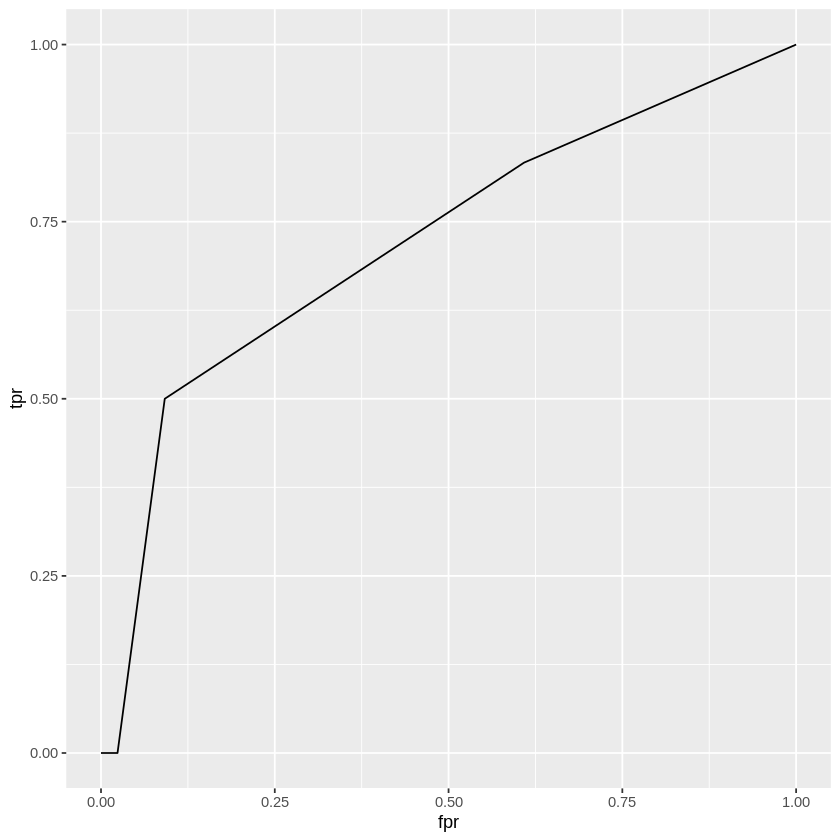

In [34]:
roc_df = roc_out$output.data
ggplot(data=roc_df, aes(x=fpr, y=tpr)) +
  geom_line()

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Looking at the above ROC Curve, we can confidently say that our model has performed well on testing data. The AUC value is 0.65 and resonates with our understanding that the model is performing ok.</p>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Conclusion</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In this demonstration, we have illustrated a simplified - but complete - overview of how we can implement a typical machine learning workflow completely inside the database using Vantage. This allows us to leverage Vantage's operational scale, power, and stability.</p>

<hr style="height:2px;border:none;background-color:#00233C;">
<b style = 'font-size:20px;font-family:Arial;color:#00233C'>9. Cleanup</b>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Work Tables</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We need to clean up our work tables to prevent errors next time.</p>

In [35]:
tables = c('clean_data', 'train_data', 'test_data')

# Loop through the list of tables and execute the drop table command for each table
for (table in tables)
{ tryCatch(
        db_drop_table(con, table)
   )}

<p style = 'font-size:18px;font-family:Arial;color:#00233C'> <b>Databases and Tables </b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We will use the following code to clean up tables and databases created for this demonstration.</p>

In [36]:
dbExecute(con,"call remove_data('demo_glm_fraud');")  # Takes 5 seconds

[1] 0

In [37]:
td_remove_context()

<hr style="height:2px;border:none;background-color:#00233C;">

<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Required Materials</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let’s look at the elements we have available for reference for this notebook:</p>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Filters:</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li><b>Industry:</b> Finance</li>
    <li><b>Functionality:</b> Machine Learning</li>
    <li><b>Use Case:</b> Fraud Detection</li>
</ul>

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Related Resources:</b></p>

<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li><a href='https://www.teradata.com/Blogs/Fraud-Busting-AI'>Fraud-Busting-AI</a></li>
    <li><a href='https://www.teradata.com/Industries/Financial-Services'>Financial Services</a></li>
    <li><a href='https://www.teradata.com/Resources/Datasheets/Move-from-Detection-to-Prevention-and-Outsmart-Fraudsters'>Move from Detection to Prevention and Outsmart Tech-Savvy Fraudsters</a></li>
</ul>

<b style = 'font-size:20px;font-family:Arial;color:#00233C'>Dataset:</b>

- `txn_id`: transaction id
- `step`: maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (31 days simulation).
- `type`: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
- `amount`: amount of the transaction in local currency
- `nameOrig`: customer who started the transaction
- `oldbalanceOrig`: customer's balance before the transaction
- `newbalanceOrig`: customer's balance after the transaction
- `nameDest`: customer who is the recipient of the transaction
- `oldbalanceDest`: recipient's balance before the transaction
- `newbalanceDest`: recipient's balance after the transaction
- `isFraud`: identifies a fraudulent transaction (1) and non fraudulent (0)
- `isFlaggedFraud`: flags illegal attempts to transfer more than 200,000 in a single transaction

<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>Links:</b></p>
<ul style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Uses a dataset and feature discovery methods outlined here: <a href = 'https://www.kaggle.com/georgepothur/4-financial-fraud-detection-xgboost/notebook'>https://www.kaggle.com/georgepothur/4-financial-fraud-detection-xgboost/notebook</a></li>
    <li>Teradataml R reference: <a href = 'https://docs.teradata.com/r/Enterprise/Teradata-Package-for-R-Function-Reference'>here</a></li>
</ul>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2024. All Rights Reserved
        </div>
    </div>
</footer>